<a href="https://colab.research.google.com/github/Kalyandask/FMML-Projects-and-labs/blob/main/AIML_project_module3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Dataset: https://drive.google.com/file/d/17p89ATYUeWsAD95nMR6hZUnMCHiLWSQK/view?usp=sharing

In [1]:
pip install numpy pandas matplotlib scikit-learn

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset from the CSV file you created
data = pd.read_csv('Salary_Data.csv')

# Separate the features (X) and the target (y)
X = data.iloc[:, 0].values
y = data.iloc[:, 1].values

# Reshape for calculations
X = X.reshape(-1, 1)
y = y.reshape(-1, 1)

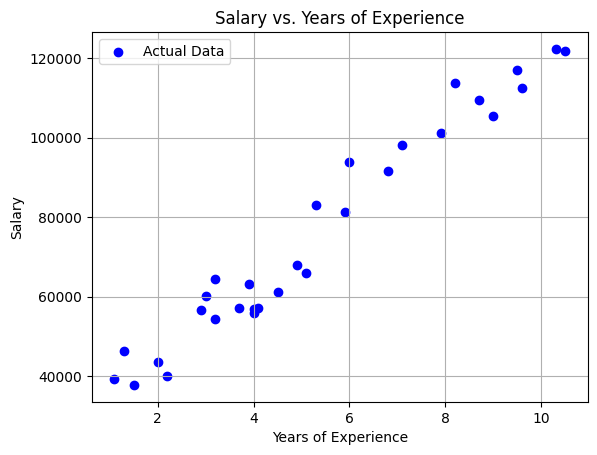

In [4]:
plt.scatter(X, y, color='blue', label='Actual Data')
plt.title('Salary vs. Years of Experience')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.legend()
plt.grid(True)
plt.show()

Parameters from scratch:
  Intercept (theta0): 25448.181745946968
  Slope (theta1): 9501.013219578916
  Final Cost (MSE): 31296754.38648183


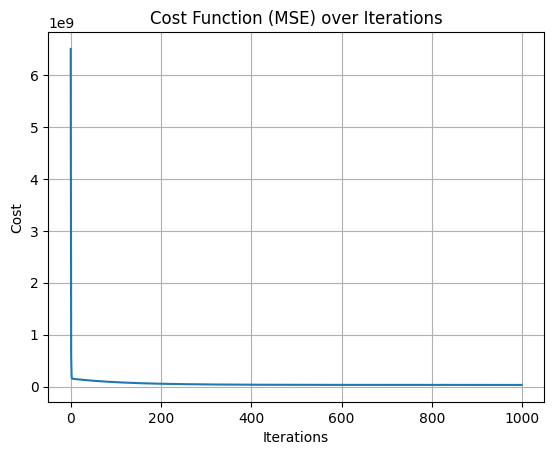

In [5]:
def gradient_descent(X, y, learning_rate, iterations):
    # Initialize parameters (theta0 and theta1)
    thetas = np.zeros((2, 1))

    # Add a column of ones to X for the intercept term (theta0)
    X_b = np.c_[np.ones((X.shape[0], 1)), X]

    m = len(X)
    cost_history = []

    for i in range(iterations):
        # Calculate predictions
        predictions = X_b.dot(thetas)

        # Calculate error
        error = predictions - y

        # Calculate gradients
        gradients = (2/m) * X_b.T.dot(error)

        # Update parameters
        thetas = thetas - learning_rate * gradients

        # Calculate and store cost (MSE)
        cost = np.mean(error**2)
        cost_history.append(cost)

    return thetas, cost_history

# Set hyperparameters
learning_rate = 0.01
iterations = 1000

# Run gradient descent
thetas_scratch, cost_history = gradient_descent(X, y, learning_rate, iterations)

theta0_scratch = thetas_scratch[0][0]
theta1_scratch = thetas_scratch[1][0]

print(f"Parameters from scratch:")
print(f"  Intercept (theta0): {theta0_scratch}")
print(f"  Slope (theta1): {theta1_scratch}")
print(f"  Final Cost (MSE): {cost_history[-1]}")

# Plot the cost function over iterations
plt.plot(range(iterations), cost_history)
plt.title('Cost Function (MSE) over Iterations')
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.grid(True)
plt.show()


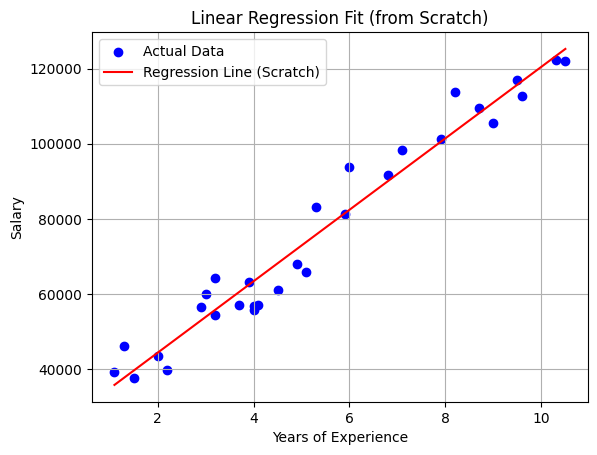

In [6]:
plt.scatter(X, y, color='blue', label='Actual Data')
plt.plot(X, theta0_scratch + theta1_scratch * X, color='red', label='Regression Line (Scratch)')
plt.title('Linear Regression Fit (from Scratch)')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.legend()
plt.grid(True)
plt.show()

Parameters from scikit-learn:
  Intercept (theta0): 25792.200198668696
  Slope (theta1): 9449.962321455076
  Mean Squared Error: 31270951.722280964


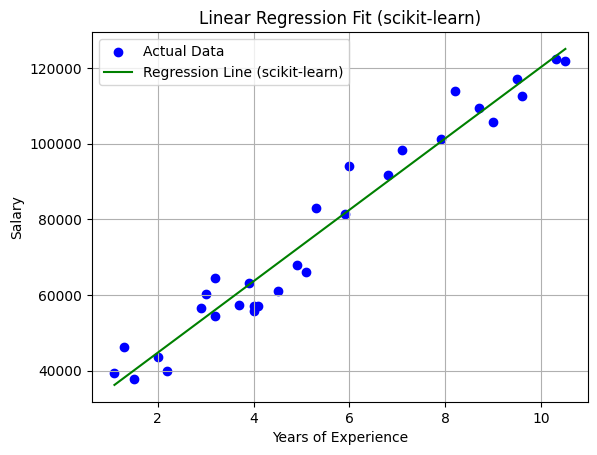

In [7]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Create and train the model
regr = LinearRegression()
regr.fit(X, y)

# Make predictions
y_pred_sklearn = regr.predict(X)

# Get the parameters and MSE
theta0_sklearn = regr.intercept_[0]
theta1_sklearn = regr.coef_[0][0]
mse_sklearn = mean_squared_error(y, y_pred_sklearn)

print(f"Parameters from scikit-learn:")
print(f"  Intercept (theta0): {theta0_sklearn}")
print(f"  Slope (theta1): {theta1_sklearn}")
print(f"  Mean Squared Error: {mse_sklearn}")

# Plot the result
plt.scatter(X, y, color='blue', label='Actual Data')
plt.plot(X, y_pred_sklearn, color='green', label='Regression Line (scikit-learn)')
plt.title('Linear Regression Fit (scikit-learn)')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.legend()
plt.grid(True)
plt.show()